In [247]:
"""
Tech Challenge - 2022/09/29
"""

'\nTech Challenge - 2022/09/29\n'

In [248]:
#Libraries:
###########
import pandas as pd
import numpy as np

## Data Load

In [249]:
# Load the data:
################

data = pd.read_csv('../data/measurements.csv')
data_2 = pd.read_excel('../data/measurements2.xlsx')

In [250]:
data.shape

(388, 12)

In [251]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [252]:
data.dtypes
#distance,consume,temp_inside should be float

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [253]:
#Update column names:
new_col_names = []
for col_name in data.columns:
    new_col_names.append(col_name.lower().replace(' ','_'))
    
data.columns=new_col_names

In [254]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [255]:
col_int_to_float = ['distance','consume','temp_inside']
#df['colname'] = df['colname'].str.replace(',', '').astype(float)

In [256]:
for col in col_int_to_float:
    data[col]=data[col].str.replace(',', '.').astype(float) #replace , to . and convert to float

In [257]:
data.dtypes
#distance,consume,temp_inside are float now

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [258]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [259]:
#We analyse second data set data_2:

In [260]:
data_2.shape

(388, 12)

In [261]:
data_2.dtypes
#columns already float, no need to change them.

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [262]:
data_2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [263]:
#let see if you have duplicated values:

In [264]:
print(data.shape)
print(data_2.shape)

(388, 12)
(388, 12)


In [265]:
print(data.dtypes)
print(data_2.dtypes)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object
distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object


In [266]:
"""
They could be the same set. So lets check that if we merge both and remove duplications, we don't have records left.

Theory:
    DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, 
    sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

    how='outer': use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
    
    indicator: bool or str, default False
    If True, adds a column to the output DataFrame called “_merge” with information on the source of each row. 
    The column can be given a different name by providing a string argument. The column will have a Categorical type with 
    the value of “left_only” for observations whose merge key only appears in the left DataFrame, “right_only” for 
    observations whose merge key only appears in the right DataFrame, and “both” if the observation’s merge key is found in
    both DataFrames.

References: 
    https://stackoverflow.com/questions/43973927/pandas-given-two-dataframe-remove-differences
    https://www.learn-codes.net/javascript/python-delete-row-to-another-row-pandas/

    Pandas remove rows from dataframe that are in another dataframe code example Example 2: delete rows in a table that 
    are present in another table 
    pandas. print (pd.merge(a,b, indicator=True, how='outer') .query('_merge=="left_only"') .drop('_merge', axis=1))
"""

'\nThey could be the same set. So lets check that if we merge both and remove duplications, we don\'t have records left.\n\nTheory:\n    DataFrame.merge(right, how=\'inner\', on=None, left_on=None, right_on=None, left_index=False, right_index=False, \n    sort=False, suffixes=(\'_x\', \'_y\'), copy=True, indicator=False, validate=None)\n\n    how=\'outer\': use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.\n    \n    indicator: bool or str, default False\n    If True, adds a column to the output DataFrame called “_merge” with information on the source of each row. \n    The column can be given a different name by providing a string argument. The column will have a Categorical type with \n    the value of “left_only” for observations whose merge key only appears in the left DataFrame, “right_only” for \n    observations whose merge key only appears in the right DataFrame, and “both” if the observation’s merge key is found in\n    both Dat

In [267]:
data.merge(data_2, indicator=True, how='outer') #SQL outer join with _merge column (both, left or right value)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas,_merge
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,0,45.0,E10,both
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,0,NaN,NaN,both
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,0,NaN,NaN,both
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,0,NaN,NaN,both
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,0,NaN,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0,NaN,NaN,both
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,1,NaN,NaN,both
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0,NaN,NaN,both
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,1,NaN,NaN,both


In [268]:
data.merge(data_2, indicator=True, how='outer').query('_merge!="both"') #where the records is NOT in both sets

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas,_merge


In [269]:
data.merge(data_2, indicator=True, how='outer').query('_merge!="both"').drop('_merge', axis=1) 
#We drop the newly created _merge column

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


In [270]:
#As I suppossed, both set are the same. So we keep working with data and leave d

## Exploratory Data Analysis

In [271]:
data.sample(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
251,11.8,4.4,42,22.5,8,NaN,E10,0,0,0,NaN,NaN
153,17.3,5.0,61,21.5,6,AC rain,E10,1,1,0,NaN,NaN
310,18.7,4.0,60,22.0,13,NaN,SP98,0,0,0,NaN,NaN
326,15.4,4.5,43,22.0,24,NaN,E10,0,0,0,NaN,NaN
261,24.5,3.9,50,NaN,15,sun,E10,0,0,1,NaN,NaN


In [272]:
"""
Assumptions:
    distance given in km
    consume in liters per 100km (too high to be by km)
    speed is time for the trip in minutes
    temp_inside,temp_outside in degree Celsius
    AC, rain, sun are weather conditions
"""

'\nAssumptions:\n    distance given in km\n    consume in liters per 100km (too high to be by km)\n    speed is time for the trip in minutes\n    temp_inside,temp_outside in degree Celsius\n    AC, rain, sun are weather conditions\n'

In [273]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [274]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [275]:
#data.isna().sum()/len(data)
data.isna().sum()/len(data)*100

#temp_inside has  3% of missing data
#specials         76%
#refill_liters    96.649485%
#refill_gas       96.649485%

#refill_liters and refill_gas has too many missing data, so we drop that column. We can't get info from there.

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

In [276]:
data.drop(columns=['refill_liters','refill_gas'],axis=1,inplace=True)

In [277]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0


In [278]:
#let's take a look to specials column:
data['specials'].value_counts(dropna=False) #including NaN values
#76% of missing values. 

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [279]:
#Let's take a look into data where specials is NOT NULL. Info of this column is on ac, rain and sun
data[~data['specials'].isnull()]
#Furthermore, information is already included in ac, rain and sun columns. So we drop it.

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0
41,4.5,5.0,29,21.5,7,AC,E10,1,0,0
50,11.8,5.1,29,21.5,5,rain,SP98,0,1,0
53,13.1,6.1,46,21.5,6,rain,SP98,0,1,0
55,153.5,4.9,82,21.5,3,rain,SP98,0,1,0
...,...,...,...,...,...,...,...,...,...,...
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0


In [280]:
data.drop(columns=['specials'],axis=1,inplace=True)

In [281]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [282]:
#temp_inside has  3% of missing data
data.temp_inside.describe()

count    376.000000
mean      21.929521
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [283]:
data.temp_inside.mode()

0    21.5
dtype: float64

In [284]:
#I replace missing values with mean:
data.temp_inside.fillna(value = data.temp_inside.mean(),inplace = True)

In [285]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [286]:
data.isna().sum() #no missing values

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

## Add columns calculations

In [287]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [288]:
#distance is measured in km
#'consume' is liters per 100km
#data.consume/100 = liters consumed in a liter. So kms time liters comsumed in a liter = total liters used per trip

data['fuel_used'] = data.distance * data.consume/100
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


In [289]:
data['gas_type'].value_counts(dropna=False)

SP98    228
E10     160
Name: gas_type, dtype: int64

In [290]:
#### Current price of each type of gas in Spain

In [291]:
"""
Fuel	Price €/liter in Spain
E10     1.511
SP98	1.617
"""

'\nFuel\tPrice €/liter in Spain\nE10     1.511\nSP98\t1.617\n'

In [292]:
#If gas_type == 'E10' then cost equal fuel*1.511, else times 1.617 (SP98). Round to 3 decimals:
data['cost_of_trip'] = np.where(data.gas_type == 'E10',data.fuel_used*1.511,data.fuel_used*1.617).round(3)


In [293]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.115
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.762
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,0.931
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.760
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.258
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,0.957
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.119
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,0.983
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.145


In [294]:
#speed is in minutes, let's put it in hours:
data['speed_in_hours'] = data.speed/60

In [295]:
# velocity (km/h) = distance (kms)/time (hours)
data['avg_speed'] = data['distance']/data['speed_in_hours']

In [296]:
#I don't need speed anymore:
data = data.drop(['speed'], axis = 1)

In [297]:
data.dtypes

distance          float64
consume           float64
temp_inside       float64
temp_outside        int64
gas_type           object
ac                  int64
rain                int64
sun                 int64
temp_diff         float64
fuel_used         float64
cost_of_trip      float64
speed_in_hours    float64
avg_speed         float64
dtype: object

In [ ]:
#Let's take a look into numeric columns:

In [91]:
data.select_dtypes(np.number) #numerical columns

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,0,0,0,9.5,1.4000,2.863,0.433333,64.615385
1,12.0,4.2,21.5,13,0,0,0,8.5,0.5040,1.031,0.500000,24.000000
2,11.2,5.5,21.5,15,0,0,0,6.5,0.6160,1.260,0.633333,17.684211
3,12.9,3.9,21.5,14,0,0,0,7.5,0.5031,1.029,0.600000,21.500000
4,18.5,4.5,21.5,15,0,0,0,6.5,0.8325,1.702,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,0,0,0,6.5,0.5920,1.274,0.650000,24.615385
384,16.1,4.3,25.0,31,1,0,0,-6.0,0.6923,1.490,0.633333,25.421053
385,16.0,3.8,25.0,19,0,0,0,6.0,0.6080,1.308,0.750000,21.333333
386,15.4,4.6,25.0,31,1,0,0,-6.0,0.7084,1.524,0.700000,22.000000


In [298]:
data_n = data.select_dtypes(np.number)
data_c = data.select_dtypes(object)

In [299]:
data_n.describe()

,distance,consume,temp_inside,temp_outside,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,speed_in_hours,avg_speed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,21.929521,11.358247,0.077320,0.123711,0.082474,10.571274,0.935294,1.468289,0.698797,26.642807
std,22.667837,1.033172,0.994666,6.991542,0.267443,0.329677,0.275441,6.698575,1.115967,1.767436,0.226642,18.681447
min,1.300000,3.300000,19.000000,-5.000000,0.000000,0.000000,0.000000,-8.000000,0.120000,0.181000,0.233333,3.714286
25%,11.800000,4.300000,21.500000,7.000000,0.000000,0.000000,0.000000,6.375000,0.551650,0.860500,0.545833,16.465116
50%,14.600000,4.700000,22.000000,10.000000,0.000000,0.000000,0.000000,11.500000,0.680600,1.065500,0.675000,22.000000
75%,19.000000,5.300000,22.500000,16.000000,0.000000,0.000000,0.000000,14.625000,0.916500,1.437250,0.833333,31.083333
max,216.100000,12.200000,25.500000,31.000000,1.000000,1.000000,1.000000,26.000000,11.453300,18.520000,1.500000,158.250000


In [300]:
data_n.describe().T #transpose 

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300000,11.800000,14.6000,19.000000,216.1000
consume,388.0,4.912371,1.033172,3.300000,4.300000,4.7000,5.300000,12.2000
temp_inside,388.0,21.929521,0.994666,19.000000,21.500000,22.0000,22.500000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000000,7.000000,10.0000,16.000000,31.0000
ac,388.0,0.077320,0.267443,0.000000,0.000000,0.0000,0.000000,1.0000
rain,388.0,0.123711,0.329677,0.000000,0.000000,0.0000,0.000000,1.0000
sun,388.0,0.082474,0.275441,0.000000,0.000000,0.0000,0.000000,1.0000
temp_diff,388.0,10.571274,6.698575,-8.000000,6.375000,11.5000,14.625000,26.0000
fuel_used,388.0,0.935294,1.115967,0.120000,0.551650,0.6806,0.916500,11.4533
cost_of_trip,388.0,1.468289,1.767436,0.181000,0.860500,1.0655,1.437250,18.5200


In [303]:
"""
Notes about this data:
    - The maximum trip (speed_in_hours) is one hour and a half and minimum 0.23 hours (that is 13.8 minutes)
    - Maximum distance is 216.1 km and minimum 1.3
    - max consume 12.2 and minimum 3.3
    - max speed 158.25 and minimum 3.71
"""

'\nNotes about this data:\n    - The maximum trip (speed_in_hours) is one hour and a half and minimum 0.23 hours (that is 13.8 minutes)\n    - Maximum distance is 216.1 km and minimum 1.3\n    - max consume 12.2 and minimum 3.3\n    - max speed 158.25 and minimum 3.71\n'

In [304]:
data.to_csv('Cobify_data_cleaned.csv', index= False)

## Visualizations

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

## E10 VS SP98

<AxesSubplot:xlabel='gas_type', ylabel='Count'>

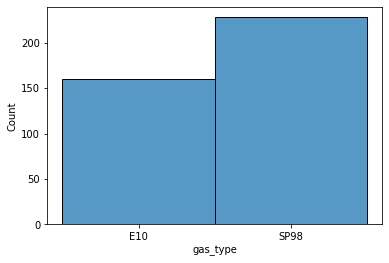

In [306]:
#other option less nicer:
sns.histplot(data=data,x=data.gas_type)
#SP98 is been use more often

<AxesSubplot:>

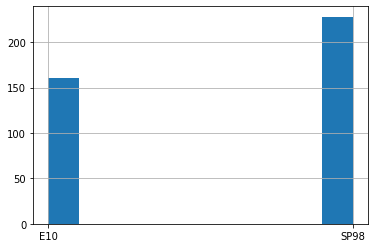

In [307]:
#other option less nicer:
data['gas_type'].hist()

## Distribution of each column

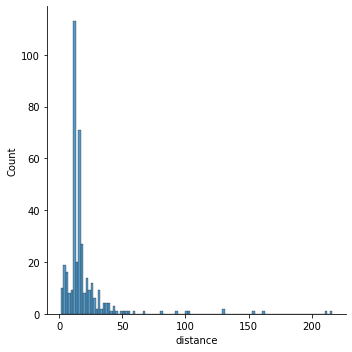

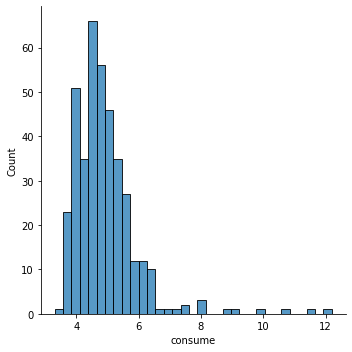

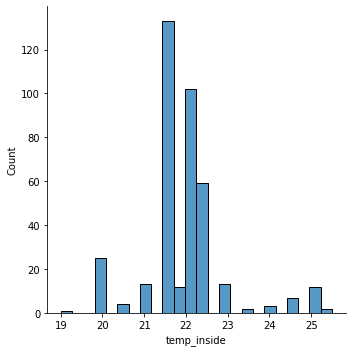

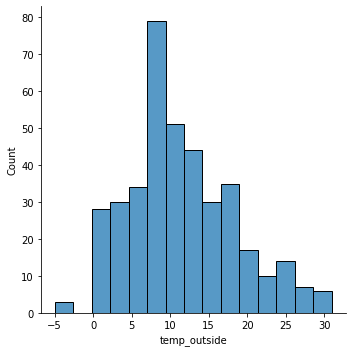

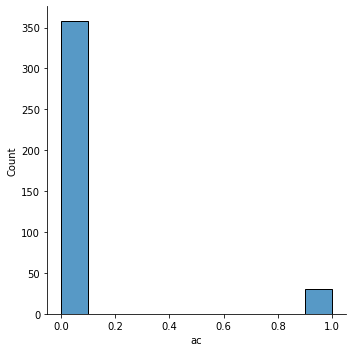

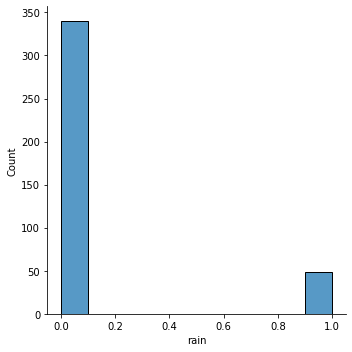

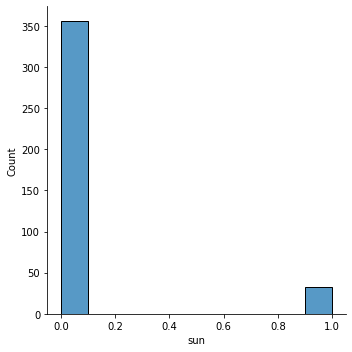

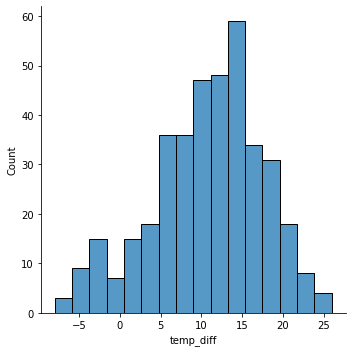

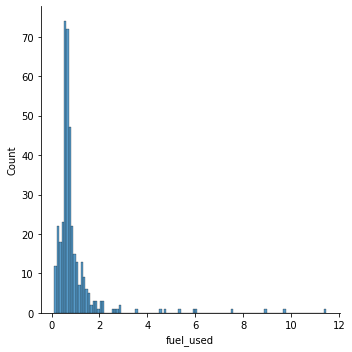

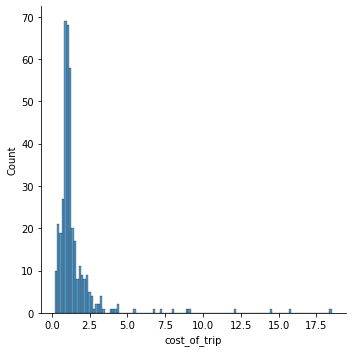

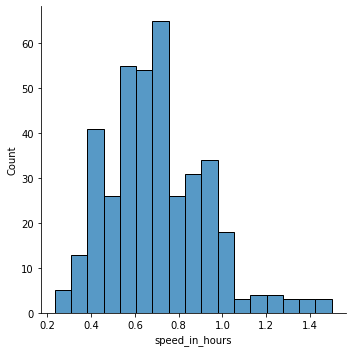

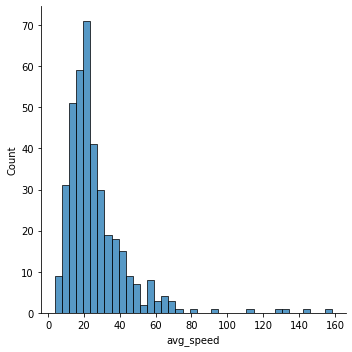

In [308]:
#Histogram for each numerical column:
for column in data_n:
    sns.displot(data_n[column])
    plt.show()

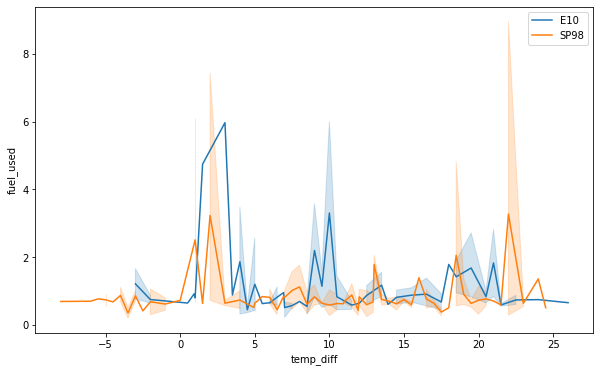

In [312]:
# The amount of fuel used based on the temperature:
fig,ax = plt.subplots(figsize=(10,6))

ax1 = sns.lineplot(data=cole10, x= data[data.gas_type=='E10'].temp_diff, y=data[data.gas_type=='E10'].fuel_used, label = 'E10')
ax2 = sns.lineplot(data=col98,  x= data[data.gas_type=='SP98'].temp_diff, y=data[data.gas_type=='SP98'].fuel_used, label = 'SP98')

plt.show()

#For temperature between 0 and 10, it seems to be beter to use SP98 (it consumes less. Orage line is lower)
# Up to 0 and between 10 and 20, both fuels have, more or less, similar behaviour
#For high temperatures (>20) it seems E10 is better.

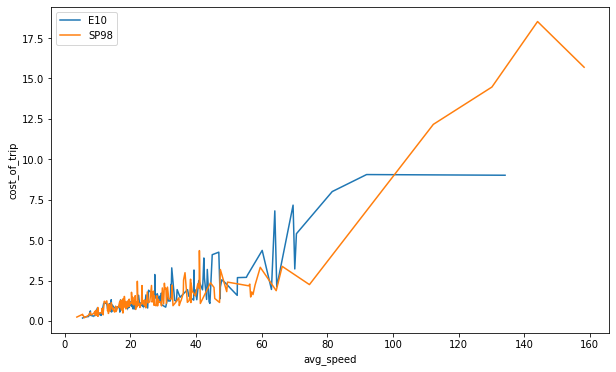

In [317]:
# The amount of fuel used based on the temperature:
fig,ax = plt.subplots(figsize=(10,6))

ax1 = sns.lineplot(data=cole10, x= data[data.gas_type=='E10'].avg_speed, y=data[data.gas_type=='E10'].cost_of_trip, label = 'E10')
ax2 = sns.lineplot(data=col98,  x= data[data.gas_type=='SP98'].avg_speed, y=data[data.gas_type=='SP98'].cost_of_trip, label = 'SP98')

plt.show()

# we can see that for speed higher than 80 km/h the cost of the trip increases drastically using SP98.

# It also shows that after an average speed of about 100 km/h (orange line passing the blue line), 
#the SP98 uses much more fuel for the higher average speed of the trip. While E10 levels out on how much fuel it uses.

In [313]:
data

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip,speed_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.115,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.762,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,0.931,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.760,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.258,0.766667,24.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,6.5,0.5920,0.957,0.650000,24.615385
384,16.1,4.3,25.0,31,SP98,1,0,0,-6.0,0.6923,1.119,0.633333,25.421053
385,16.0,3.8,25.0,19,SP98,0,0,0,6.0,0.6080,0.983,0.750000,21.333333
386,15.4,4.6,25.0,31,SP98,1,0,0,-6.0,0.7084,1.145,0.700000,22.000000


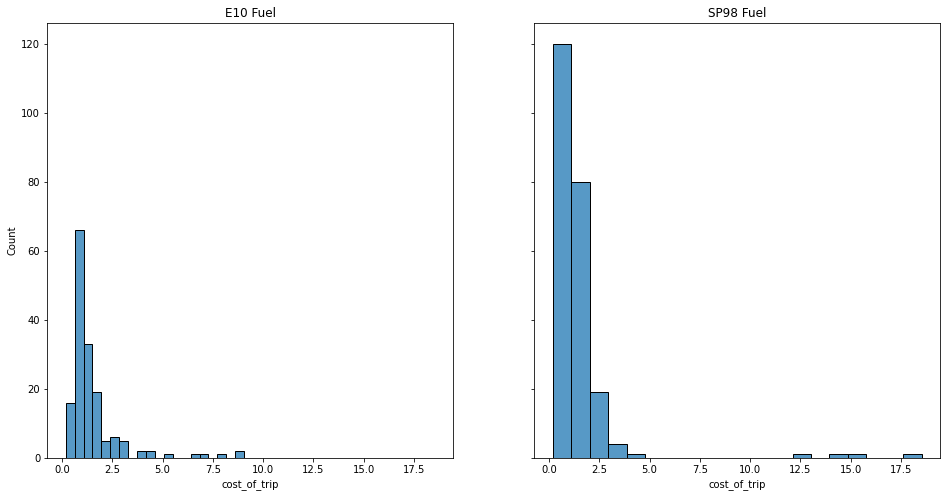

In [337]:

fig,ax = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)

sns.histplot(ax=ax[0],data=data[data.gas_type=='E10'], x= data[data.gas_type=='E10'].cost_of_trip, bins=20, label = 'E10 Cost per trip').set(title='E10 Fuel')
sns.histplot(ax=ax[1],data=data[data.gas_type=='SP98'],  x= data[data.gas_type=='SP98'].cost_of_trip,bins=20, label = 'SP98 Cost per trip').set(title='SP98 Fuel')

plt.show()


# This shows number of trips and cost per trip. 
# We can see that for more expensibe trips SP98 fuel is been used

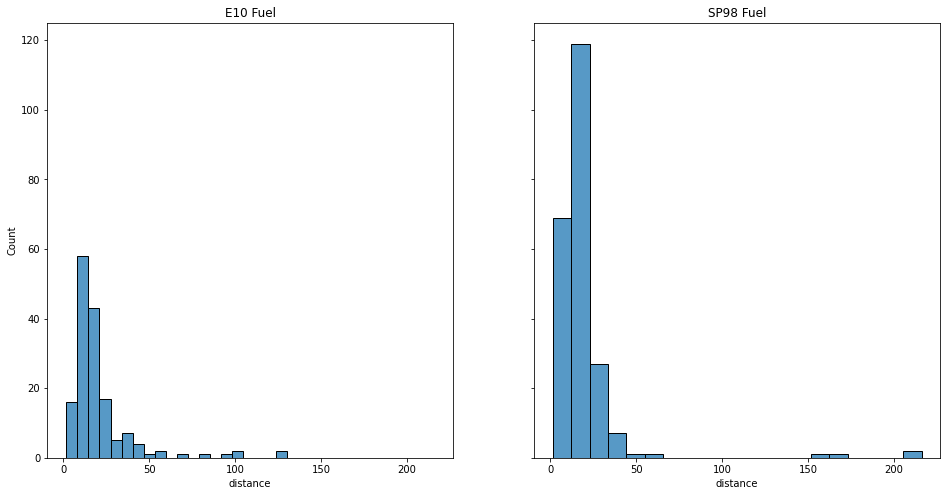

In [338]:

fig,ax = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)

sns.histplot(ax=ax[0],data=data[data.gas_type=='E10'], x= data[data.gas_type=='E10'].distance, bins=20, label = 'E10 Cost per trip').set(title='E10 Fuel')
sns.histplot(ax=ax[1],data=data[data.gas_type=='SP98'],  x= data[data.gas_type=='SP98'].distance,bins=20, label = 'SP98 Cost per trip').set(title='SP98 Fuel')

plt.show()


# This shows number of trips and distance. 
# We can see that for trips with longer distances, SP98 fuel is been used

# Conclusions

In [ ]:
#SP98 is been use more often

#For temperature between 0 and 10, it seems to be beter to use SP98 (it consumes less)
#For high temperatures (>20) it seems E10 is better.

# we can see that for speed higher than 80 km/h the cost of the trip increases drastically using SP98.

# It also shows that after an average speed of about 100 km/h (orange line passing the blue line), 
#the SP98 uses much more fuel for the higher average speed of the trip. While E10 levels out on how much fuel it uses.

# We can see that for more expensibe trips SP98 fuel is been used

# We can see that for trips with longer distances, SP98 fuel is been used